### 【 EDA - 산포도 】

- 전체 데이터의 분포 즉, 대푝밧 기준으로 퍼진 정도
- 통계량 : 편차, 분산, 표준편차, 평균절대편차, 중위절대편차, 백분위수, 사분위수, ...

### 【 필수 Python 패키지 】
- scipy 패키지
    * Scientific Python의 약자 
    * 수학·통계·최적화·신호처리·선형대수·수치해석·확률분포 등 고급 과학 계산 기능 제공
    * 파이썬의 MATLAB 역할을 하는 패키지
    * SciPy의 거의 모든 기능은 NumPy의 ndarray를 기반으로 동작
    * NumPy에 없던 고급 수학 기능을 제공하는 상위 라이브러리
    * NumPy + SciPy = 파이썬 과학 컴퓨팅 표준 조합

    * 주요 서브패키지
        - 통계 분석 → scipy.stats
        - 최적화 (optimization) → scipy.optimize
        - 선형대수 해석 → scipy.linalg
        - 미분방정식(ODE) → scipy.integrate
        - 신호처리 (FFT, filtering) → scipy.signal
        - 거리 계산 & 공간(Geometry) → scipy.spatial
        - 보간 → scipy.interpolate
        - 이미지 처리, 수치적 적분/미분, 과학·공학 계산 프로젝트
    * 설치 : conda install scipy

- statsmodels 패키지
    * 회귀분석, 시계열 분석, 통계적 검정, ANOVA, GLM 등 전통적 통계모델 제공 패키지.
    * 통계 모델링 + 추론 + 회귀 결과표(summary)를 제공 패키지
    * 회귀분석(OLS)
    * 시계열 분석
    * 통계 검정(Statistical Tests) 풍부

    * 주요 서브패키지
        - 회귀분석 → statsmodels.api
        - 시계열 → statsmodels.tsa.api
        - 검정 → statsmodels.stats.api

    * 설치 : conda install statsmodels

[1] 모듈 로딩<hr>

In [40]:
import pandas as pd              ## 데이터 분석용
import numpy as np               ## 로우 데이터 저장 및 수치 계산용
from statsmodels import robust  ## 통계 관련 모듈용
import matplotlib.pyplot as plt  ## 시각화 모듈
import koreanize_matplotlib      ## 한글 폰트 설정 모듈

[2] 데이터 준비 <hr>

In [41]:
## 데이터 파일
DATA_FILE = '../DATA/state.csv'

stateDF = pd.read_csv(DATA_FILE)
stateDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


[3] 위치추정/대표값 찾기 - 평균 <hr>

In [42]:
## ------------------------------------------------------------------
## 표준편차, 사분위수, 중위절대편차
## ------------------------------------------------------------------
## - Pandas 
print(f'표준편차 => { stateDF["Population"].std() }')
print(f'1사분위수 => { stateDF["Population"].quantile(0.25) }')
print(f'3사분위수 => { stateDF["Population"].quantile(0.75) }')
print(f'사분위수범위 => { stateDF["Population"].quantile(0.75) - stateDF["Population"].quantile(0.25) }')

## - Numpy
print(f'표준편차 => { np.std(stateDF["Population"]) }')
print(f'1사분위수 => { np.percentile(stateDF["Population"], 25) }')

print(f'중위절대편차 => { robust.mad(stateDF["Population"]) }')


표준편차 => 6848235.347401142
1사분위수 => 1833004.25
3사분위수 => 6680312.25
사분위수범위 => 4847308.0
표준편차 => 6779407.114632265
1사분위수 => 1833004.25
중위절대편차 => 3849876.1459979336


[4] 데이터 분포 시각화 - 상자그림 Box Plot

In [43]:
## 인구수 분포 시각화
dataSR = stateDF['Population']/1_000_000

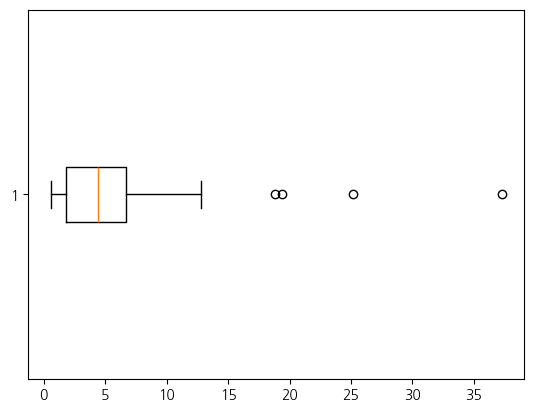

In [44]:
retDict = plt.boxplot(dataSR, vert=False)

plt.show()

In [47]:
## 상자그래프 결과 => Dict
for key in retDict:
    print(key, retDict[key])

outliers = retDict['fliers'][0]
print('이상치 :', outliers.get_xdata())

whiskers [<matplotlib.lines.Line2D object at 0x0000023D11049C50>, <matplotlib.lines.Line2D object at 0x0000023D1104A610>]
caps [<matplotlib.lines.Line2D object at 0x0000023D1104ABD0>, <matplotlib.lines.Line2D object at 0x0000023D1104B310>]
boxes [<matplotlib.lines.Line2D object at 0x0000023D11049010>]
medians [<matplotlib.lines.Line2D object at 0x0000023D11098290>]
fliers [<matplotlib.lines.Line2D object at 0x0000023D11098B50>]
means []
이상치 : [37.253956 18.80131  19.378102 25.145561]


[5] 데이터 분포 시각화 - 도수분포표/히스토그램

Population
L-0    24
L-1    14
L-2     6
L-3     2
L-4     1
L-5     1
L-6     1
L-9     1
L-7     0
L-8     0
Name: count, dtype: int64

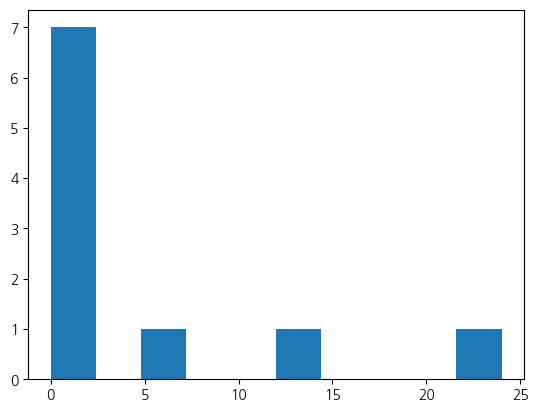

In [46]:
## 수치형 => 범주형 변환 - 구간(bin)별로 데이터를 묶어주기
sr, bins = pd.cut(stateDF['Population'], bins=10, retbins=True, labels=[f'L-{idx}' for idx in range(10)])

## 도수분포표
dataSR = sr.value_counts()
display(dataSR)

## 시각화
plt.hist(dataSR)
plt.show()